# HARRY POTTER TEXT MINING DIY

In [1]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
import re
from func import prova
from func.prova import text_analyzer, stemmer, stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


read the single book

In [2]:
def read_hp(title_path):
    with open(title_path, "r", encoding="utf8") as book:
        lines = [line.strip() for line in book.readlines() if not (line.startswith("Page |") or line.strip() == '')]
    # Join the lines into a single string
    text = '\n'.join(lines)
    text = text.replace("\n", " ").replace("\r", "").replace("CHPT", "")
    
    return text
book1 = read_hp('Book1.txt')
book2 = read_hp('Book2.txt')
book3 = read_hp('Book3.txt')
book4 = read_hp('Book4.txt')
book5 = read_hp('Book5.txt')
book6 = read_hp('Book6.txt')
book7 = read_hp('Book7.txt')

I collect all the books together and transform to the lower case

In [3]:
books = book1 + book2 + book3 + book4 + book5 + book6 + book7
books = books.lower()

I start managing my text:
1. create my own tokenizer:
    1. consider all the words
    2. consider common 

In [4]:
import re

class CustomTokenizer:
    def __init__(self):
        self.patterns = [
            #(r'\w+', 'WORD'),         # Matches words
            #(r'\d+', 'NUMBER'),        # Matches numbers
            #(r'[.,;!?]', 'PUNCTUATION'),  # Matches common punctuation
            #(r"\b(?:\w+'\w*|\w+?n't)\b", 'abbreviation')
            (r"\b\w+'t\b|\b\w+\b|'\w+\b", "WORD")
            # (r'\b[A-Za-z]+\.(?![a-z])', 'WORD')  # Matches sequences of capitalized words (potential sentences)
            # (r'\b(?:[A-Za-z]+\.?\'?[A-Za-z]*|\w+)\b', 'WORD'),
            #(r"\b(?:\w+'\w*|(?<!\w)'(?:t|re|s|m|ll|ve)\b|\w+)\b", 'WORD')
        ]

    def tokenize(self, text):
        tokens = []
        for pattern, token_type in self.patterns:
            regex = re.compile(pattern)
            matches = regex.finditer(text)
            for match in matches:
                tokens.append((match.group(), token_type))
        return tokens

# Example usage:
custom_tokenizer = CustomTokenizer()
text = "Hello, World! This is a custom tokenizer. mr. how are you. and maybe's jr. st. or whatever three-quarters don't jarry's"
tokens = custom_tokenizer.tokenize(text)
print(tokens)

[('Hello', 'WORD'), ('World', 'WORD'), ('This', 'WORD'), ('is', 'WORD'), ('a', 'WORD'), ('custom', 'WORD'), ('tokenizer', 'WORD'), ('mr', 'WORD'), ('how', 'WORD'), ('are', 'WORD'), ('you', 'WORD'), ('and', 'WORD'), ('maybe', 'WORD'), ("'s", 'WORD'), ('jr', 'WORD'), ('st', 'WORD'), ('or', 'WORD'), ('whatever', 'WORD'), ('three', 'WORD'), ('quarters', 'WORD'), ("don't", 'WORD'), ('jarry', 'WORD'), ("'s", 'WORD')]


from this list I want to keep only the words without considering the punctuation and the numbers

In [5]:
hp_tokens = custom_tokenizer.tokenize(books)
hp_tokens = [i[0] for i in hp_tokens if i[1] == 'WORD']

now that i have the tokens from the books, i'm going to delete the stop words (taken from a common dict and defined by us using some frequences statics.

In [6]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# hp_tokens_sw = [i for i in hp_tokens if i not in ENGLISH_STOP_WORDS]
# stop_words = stopwords.words('english')
# hp_stop_w = list(set(list(ENGLISH_STOP_WORDS) + stop_words))
# print(hp_stop_w)
with open("stop_words.txt", 'r') as file:
    hp_stop_w = [words.strip() for words in file.readlines() if not (words.startswith("Page |") or words.strip() == '')]

hp_tokens_sw = [i for i in hp_tokens if i not in hp_stop_w]
hp_tokens_sw = [word for word in hp_tokens_sw if not word.startswith("'")]

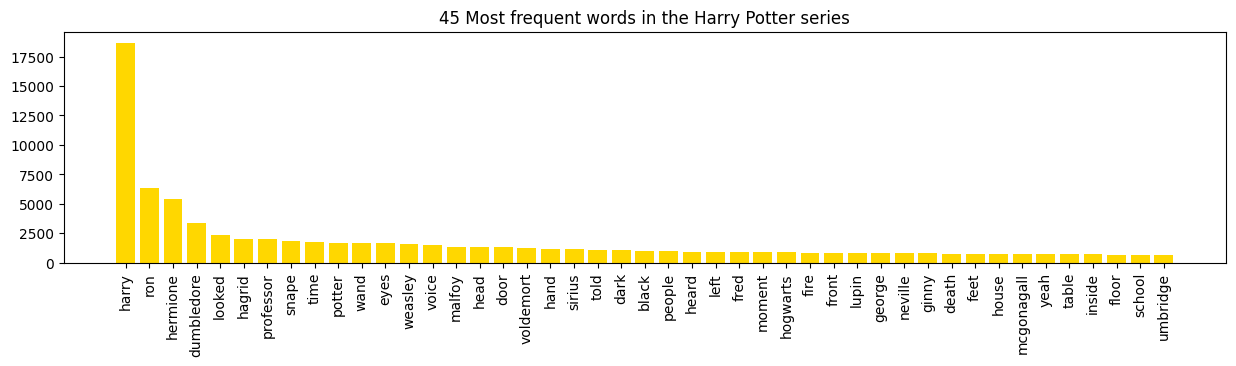

In [7]:
hp_counter = Counter(hp_tokens_sw)
# hp_counter2 = Counter(hp_tokens_test)
N = 45

plt.figure(figsize=(15, 3))

# plt.subplot(121)
plt.title("{} Most frequent words in the Harry Potter series".format(N))
plt.bar(*zip(*hp_counter.most_common(N)), color="gold")
plt.xticks(rotation="vertical")



plt.show()

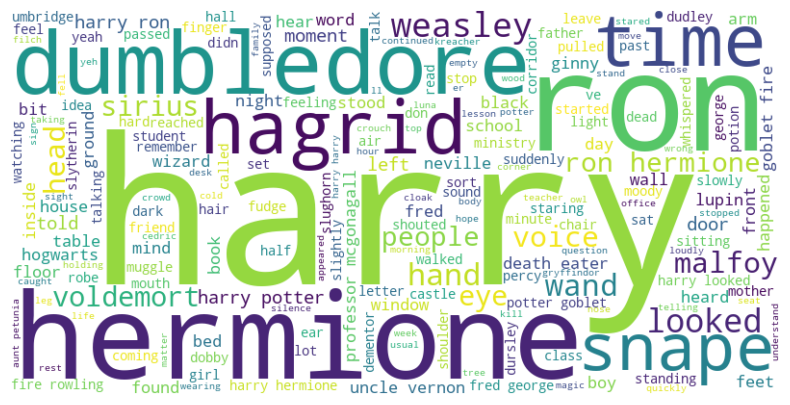

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(hp_tokens_sw))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

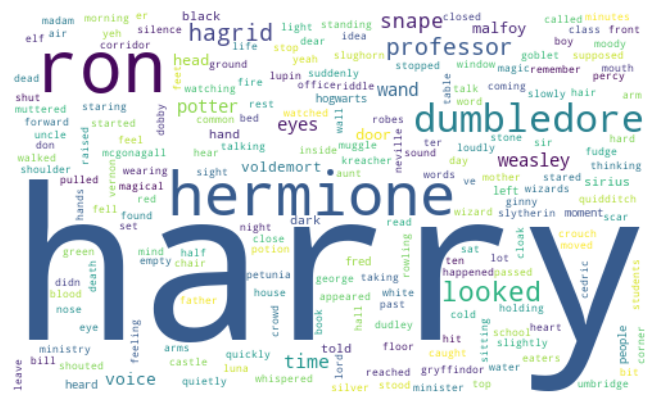

In [9]:
# MASK = plt.imread("figures/twitter.jpg")
MAX_WORDS = 200
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1


hp = WordCloud(
    width=500, 
    height=300,
    # mask = MASK,
    max_words = MAX_WORDS, 
    background_color = "white",
    max_font_size = MAX_FONT_SIZE,
    relative_scaling = RELATIVE_SCALING,
).generate_from_frequencies(hp_counter)

plt.figure(figsize=(10, 5))
plt.imshow(hp, interpolation='bilinear')
plt.axis('off')
plt.show()


In [10]:
hp_stem = [stemmer.stem(token) for token in hp_tokens_sw]

## ORA LO FACCIAMO PER LIBRO 

In [11]:
hp_books = [book1, book2, book3, book4, book5, book6, book7]

In [12]:
def preproc(text, custom_tokenizer, stop_words): 
    text = text.lower()
    text = custom_tokenizer.tokenize(text)
    text = [i[0] for i in text if i[1] == 'WORD']
    text = [i for i in text if i not in stop_words]
    text = [word for word in text if not word.startswith("'")]
    text = [i for i in text if len(i)>1]
    return text

In [13]:
# Assuming you are in a loop
books_hp_token = {}  # Dictionary to store the lists

for i in range(len(hp_books)):  # Replace 5 with the desired number of iterations
    book_name = f"book_{i+1}"
    # book_token = []  # Create a new list for each iteration
    books_hp_token[book_name] = preproc(hp_books[i], custom_tokenizer, stop_words = hp_stop_w)

books_hp_stem = {}
for i in range(len(hp_books)):  # Replace 5 with the desired number of iterations
    book_name = f"book_{i+1}"
    # book_token = []  # Create a new list for each iteration
    books_hp_stem[book_name] = [stemmer.stem(token) for token in books_hp_token[book_name]]

In [14]:
books_hp_token["book_3"]

['owl',
 'post',
 'harry',
 'potter',
 'highly',
 'unusual',
 'boy',
 'hated',
 'summer',
 'holidays',
 'time',
 'homework',
 'forced',
 'secret',
 'dead',
 'night',
 'happened',
 'wizard',
 'midnight',
 'lying',
 'stomach',
 'bed',
 'blankets',
 'drawn',
 'head',
 'tent',
 'flashlight',
 'hand',
 'leather',
 'bound',
 'book',
 'history',
 'magic',
 'bathilda',
 'bagshot',
 'propped',
 'pillow',
 'harry',
 'moved',
 'tip',
 'eagle',
 'feather',
 'quill',
 'page',
 'frowning',
 'looked',
 'write',
 'essay',
 'witch',
 'burning',
 'fourteenth',
 'century',
 'completely',
 'pointless',
 'discuss',
 'quill',
 'paused',
 'top',
 'paragraph',
 'harry',
 'pushed',
 'round',
 'glasses',
 'bridge',
 'nose',
 'moved',
 'flashlight',
 'closer',
 'book',
 'read',
 'magic',
 'people',
 'commonly',
 'muggles',
 'afraid',
 'magic',
 'medieval',
 'times',
 'recognizing',
 'rare',
 'occasion',
 'catch',
 'real',
 'witch',
 'wizard',
 'burning',
 'effect',
 'whatsoever',
 'witch',
 'wizard',
 'perform',

## PLATONE

### SPIEGONE 

Inizialmente partiamo prendendo le 400 parole più frequenti all'interno del primo e del settimo libro (che saranno gli estremi del nostro ordinamento di libri) e di queste parole, terremo quelle che sono presenti anche negli altri 5 libri eliminando le parole che ai fini dell'analisi non ci sembrano rilevanti.

Dentro `books_hp_stem` abbiamo gli stemmi per ciascun libro, ora ci creiamo un dizionario che conti le parole del primo e del settimo

In [15]:
x = Counter(books_hp_stem['book_1'])
book11 = dict(sorted(x.items(),key=lambda item: item[1], reverse=True))
y = Counter(books_hp_stem['book_7'])
book77 = dict(sorted(y.items(),key=lambda item: item[1], reverse=True))

Ora quindi ci teniamo le prime 400 parole dal primo e dal settimo libro che sono quelli che mi definiranno l'ordinamento dei libri

In [16]:
# take the most common stems that are in book 1 and book 7
book11 = dict(list(book11.items())[:400])
book77 = dict(list(book77.items())[:400])
most_comm_17 = list(set(book11.keys()) & set(book77.keys()))

In [17]:
most_comm_tot = most_comm_17.copy()

In [18]:
#keep the most common stems that are also in the other books
for i in range(len(books_hp_stem)):  # Replace 5 with the desired number of iterations
    book_name = f"book_{i+1}"
    most_comm_tot = [i for i in most_comm_tot if i in books_hp_stem[book_name]]

We consider two initial population $W_1$ = *Harry Potter and the Phylosopher stone* and $W_7$ = *Harry Potter and the deathly hallows*. Let $n_{i1}$ the frequence of the *i*-th stem for *i* = 1, $\dots$, $N_{stems}$ in book 1 and let $N_1 = \sum_{i}n_{i1}$ and $N_7$ the corrispondent sum for $W_7$. We indicate with $\theta_{1i}$, for $i = 1, \dots, p$ the probability that the i-th word is in $W_1$ and $\theta_{7i}$ for $i = 1, \dots, p$ the same quantity for $W_7$. The probability to observe a sample from $W_1$ and $W_7$ follows a multinomial distribution. Using the log likelihood ratio test to compare the two samples we get the expression:

$$ \sum_{i=1}^{N_{stem}} n_i\log\frac{\theta_{7i}}{\theta_{1i}}$$

We can see that every word has a sort of score, like:

$$ s_i = \log{\frac{\theta_{7i}}{\theta_{1i}}}$$



In [19]:
filtered_dict = {key: value for key, value in Counter(books_hp_stem['book_1']).items() if key in most_comm_tot}
xx = sorted(filtered_dict.items(),key=lambda item: item[1], reverse=True)
df_book = pd.DataFrame(xx, columns = ['Stems', 'Count_1'])
df_book['Freq_1'] = df_book['Count_1']/df_book['Count_1'].sum()
df_book.head()

filtered_dict = {key: value for key, value in Counter(books_hp_stem['book_7']).items() if key in most_comm_tot}
# xx = dict(sorted(filtered_dict.items(),key=lambda item: item[1], reverse=True))
df_book['Count_7'] = df_book['Stems'].map(xx)
df_book['Freq_7'] = df_book['Stems'].map(xx)/df_book['Stems'].map(xx).sum()
df_book.head()


TypeError: 'list' object is not callable

Now the idea is to extend the analysis to the other books, which represent new populations to be classified, and use the total score of each book as a discriminant function. Thus let $W_k$ with $k = 2,3,4,5,6$ be the populations that represent the books from 2 to 6. For these populations, the same results apply as for $W_1$ to $W_7$. So for each $W_k$ with $k = 2,3,4,5,6,7$ we can calculate a measure that represents the comprehensive score assigned to each $W_k$. In particular for each $W_k$ where $N_k = \sum_i n_{ik}$ one can calculate the average score

$$
s_k = \frac{1}{N_k} \sum_{i=1}^{N_{stem}} n_{i} \log \frac{\theta_{1i}}{\theta_{7i}} = \sum_{i=1}^{N_{stem}} n_{i}s_i \quad i = 1, ..., N_{stem}.
$$

To calculate the average scores we need to estimate the parameter vectors $\theta_1$ and $\theta_7$. Since both $N_1$ and $N_7$ are high, the probabilities $\hat{\theta}_{i1}$ and $\hat{\theta}_{i7}$ can be estimated with the corresponding observed frequencies. So we find for all five books to be classified an associated score that represents the positioning of that book. This measure can be interpreted in relative terms to understand which are the furthest books and which are the closest. To make inferences and evaluate the significance of the results obtained, we can also define the variance of $s_k$, for which an unbiased estimate is


$$
\hat{V}(\bar{s}_k) = \frac{1}{N_k(N_k - 1)} \left( \sum_{i=1}^{N_{stem}} n_i s_i^2 - \frac{1}{N_k} \left( \sum_{i=1}^{N_{stem}} n_i s_i \right)^2 \right).
$$

Given that $N_k$ is large, $s_k - s_k'$ will be approximately normally distributed with variance equal to the sum of the corresponding variances; therefore, to test the significance, we can use the usual $t$-test.


In [ ]:
# this function create the counts and the freq for every book
def hp_count(idx):
    #create the dict with the frequencies for the i-th book
    xx = {key: value for key, value in Counter(books_hp_stem[idx]).items() if key in most_comm_tot}
    count = df_book['Stems'].map(xx)
    freq  = df_book['Stems'].map(xx)/df_book['Stems'].map(xx).sum()
    df = pd.DataFrame
    return count, freq

# with this loop we add a column for each of the book with their own freq and counts
for i in range(2, 7):
    book_idx = f"book_{i}"
    col_count, col_freq = hp_count(book_idx)
    df_book[f"Count_{i}"] = np.array(col_count)
    df_book[f"Freq_{i}"]= np.array(col_freq)

df_book.head()

In [ ]:
def hp_scores(df, idx):
    N = df[f"Count_{idx}"].sum()
    n = df[f"Count_{idx}"]
    theta1 = df['Freq_1']
    theta7 = df['Freq_7']
    return round(1/N * sum(n*np.log(theta1/theta7)), 4)

scores = {}
for i in range(2, 7):
    scores[f"book_{i}"] = {'score': hp_scores(df_book, i)}

sorted_scores = sorted(scores.items(), key=lambda item: item[1]['score'], reverse = True)
scores = {k: v for k, v in sorted_scores}

scores

In [ ]:
def hp_var(df, idx):
    N = df[f"Count_{idx}"].sum()
    n = df[f"Count_{idx}"]
    theta1 = df['Freq_1']
    theta7 = df['Freq_7']
    return round(1/(N * (N - 1))*(sum(n * np.log(theta1/theta7)**2) - 1/N * (sum(n * np.log(theta1/theta7))**2)), 6)
for i in range(2, 7):
    scores[f"book_{i}"]['Variance'] = hp_var(df_book, i)
scores

### t-test

In [ ]:
def t_test(dict):
    